<a href="https://colab.research.google.com/github/jpseixasesilva/LHC-ML/blob/master/Particles_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HEAD

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Come to the right path
cd /content/drive/My Drive/Colab Notebooks/hadron-collider-machine-learning-master/week2

/content/drive/My Drive/Colab Notebooks/hadron-collider-machine-learning-master/week2


In [0]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, chi2

In [0]:
dataorigin = pd.read_csv('training.csv.gz')

In [0]:
dataorigin['Label'].head(10)

0        Muon
1       Ghost
2       Ghost
3        Pion
4      Proton
5        Kaon
6        Kaon
7       Ghost
8    Electron
9      Proton
Name: Label, dtype: object

# Ghost extraction

In [0]:
#Selecting index
dataless.set_index("Label", inplace=True)

In [0]:
ghost = dataless.loc['Ghost']
ghost.head(50)

In [0]:
cd 

In [0]:
export_csv = ghost.to_csv(r'/content/drive/My Drive/Colab Notebooks/hadron-collider-machine-learning-master/week2/ghost.csv', index = None, header=True)

# Data Transformation | Splitting | Normalization 

In [0]:
data=pd.DataFrame(dataorigin)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data.Label)
le.classes_
labels = le.transform(data.Label)

labelspd = pd.DataFrame(labels)
labelspd.columns = ['Label']
data.drop(['Label'],axis=1,inplace=True)
datatrans = pd.concat([data,labelspd],axis=1)
dataprep = pd.DataFrame(datatrans)
#TRAIN TEST SPLIT

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(datatrans.drop('Label',axis=1), 
                                                    datatrans['Label'],
                                                    test_size=0.20, 
                                                    random_state=101)

# NORMALIZATION

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train_sc = sc_x.fit_transform(X_train)
X_test_sc = sc_x.transform(X_test)

# Feature Selections 

## Select K Best features implementation

In [0]:
#apply SelectKBest class to extract top 49 best features
bestfeatures = SelectKBest(score_func=f_classif, k=49)
fit = bestfeatures.fit(X_train_sc,y_train.values.ravel())
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(49,'Score'))  #print 10 best features

                              Specs          Score
44                         MuonFlag  272079.501493
29                     MuonLLbeMuon  214466.418836
19                      MuonLLbeBCK  213788.038345
3                     MuonLooseFlag  211133.811080
33                 GhostProbability  162993.061421
15              TrackQualityPerNDoF   58420.614867
14                            EcalE   23653.092946
32                    RICHpFlagKaon   20507.862716
23                          TrackPt   18265.391355
31                  RICHpFlagProton   16402.080764
41                   RICH_DLLbeKaon   12557.966669
48                 RICH_DLLbeProton   12416.684602
35                    RICH_DLLbeBCK   12313.789046
47                   RICH_DLLbeMuon   11830.723984
25                    RICHpFlagPion   11792.241891
0                            TrackP   11768.264874
42               RICH_DLLbeElectron   11047.209101
27                 Calo3dFitQuality   10861.166920
36                        FlagR

In [0]:
db = pd.DataFrame(featureScores.nlargest(49,'Score'))
min = (pd.DataFrame.max(db['Score']))/100
n_top_values=0
for i in db['Score']:
  if i>=min:
    n_top_values +=1
specs = pd.DataFrame(featureScores.nlargest(n_top_values,'Score')) 
print(specs)

                    Specs          Score
44               MuonFlag  272079.501493
29           MuonLLbeMuon  214466.418836
19            MuonLLbeBCK  213788.038345
3           MuonLooseFlag  211133.811080
33       GhostProbability  162993.061421
15    TrackQualityPerNDoF   58420.614867
14                  EcalE   23653.092946
32          RICHpFlagKaon   20507.862716
23                TrackPt   18265.391355
31        RICHpFlagProton   16402.080764
41         RICH_DLLbeKaon   12557.966669
48       RICH_DLLbeProton   12416.684602
35          RICH_DLLbeBCK   12313.789046
47         RICH_DLLbeMuon   11830.723984
25          RICHpFlagPion   11792.241891
0                  TrackP   11768.264874
42     RICH_DLLbeElectron   11047.209101
27       Calo3dFitQuality   10861.166920
36              FlagRICH2   10119.641137
40          RICHpFlagMuon    9144.600335
39              TrackNDoF    7869.534905
8       RICHpFlagElectron    7635.982108
24       TrackDistanceToZ    6422.872320
43              

In [0]:
datak = pd.DataFrame(datatrans)
datak.head(5)

,TrackP,TrackNDoFSubdetector2,BremDLLbeElectron,MuonLooseFlag,FlagSpd,SpdE,EcalDLLbeElectron,DLLmuon,RICHpFlagElectron,EcalDLLbeMuon,TrackQualitySubdetector2,FlagPrs,DLLelectron,DLLkaon,EcalE,TrackQualityPerNDoF,DLLproton,PrsDLLbeElectron,FlagRICH1,MuonLLbeBCK,FlagHcal,EcalShowerLongitudinalParameter,Calo2dFitQuality,TrackPt,TrackDistanceToZ,RICHpFlagPion,HcalDLLbeElectron,Calo3dFitQuality,FlagEcal,MuonLLbeMuon,TrackNDoFSubdetector1,RICHpFlagProton,RICHpFlagKaon,GhostProbability,TrackQualitySubdetector1,RICH_DLLbeBCK,FlagRICH2,FlagBrem,HcalDLLbeMuon,TrackNDoF,RICHpFlagMuon,RICH_DLLbeKaon,RICH_DLLbeElectron,HcalE,MuonFlag,FlagMuon,PrsE,RICH_DLLbeMuon,RICH_DLLbeProton,Label
0,74791.156263,15.0,0.232275,1.0,1.0,3.2,-2.505719,6.604153,1.0,1.929960,17.585680,1.0,-6.411697,-7.213295,0.000001,1.467550,-26.667494,-2.730674,1.0,-5.152923,1.0,-999.000000,19.954819,3141.930677,0.613640,1.0,-0.909544,-999.000000,1.0,-0.661823,4.0,1.0,1.0,0.018913,5.366212,-21.913000,1.0,1.0,1.015345,28.0,1.0,-7.213300,-0.280200,5586.589846,1.0,1.0,10.422315,-2.081143e-07,-24.824400,3
1,2738.489989,15.0,-0.357748,0.0,1.0,3.2,1.864351,0.263651,1.0,-2.061959,20.230680,1.0,5.453014,0.000006,1531.542000,3.570540,-0.711194,1.773806,1.0,-999.000000,0.0,33.187644,0.037601,199.573653,0.465480,1.0,0.434909,13.667366,1.0,-999.000000,10.0,0.0,0.0,0.351206,9.144749,-0.703617,0.0,1.0,-2.394644,32.0,1.0,-0.324317,1.707283,-0.000007,0.0,1.0,43.334935,2.771583e+00,-0.648017,1
2,2161.409908,17.0,-999.000000,0.0,0.0,-999.0,-999.000000,-999.000000,0.0,-999.000000,11.619878,0.0,-999.000000,-999.000000,-999.000000,0.826442,-999.000000,-999.000000,0.0,-999.000000,0.0,-999.000000,-999.000000,94.829418,0.241891,0.0,-999.000000,-999.000000,0.0,-999.000000,5.0,0.0,0.0,0.195717,1.459992,-999.000000,0.0,0.0,-999.000000,27.0,0.0,-999.000000,-999.000000,-999.000000,0.0,0.0,-999.000000,-9.990000e+02,-999.000000,1
3,15277.730490,20.0,-0.638984,0.0,1.0,3.2,-2.533918,-8.724949,1.0,-3.253981,15.336305,1.0,-10.616585,-39.447507,4385.688000,1.076721,-29.291509,-3.053104,1.0,-999.000000,1.0,231.190351,2.839508,808.631064,0.680705,1.0,-1.504160,1939.259641,1.0,-999.000000,9.0,0.0,1.0,0.003972,22.950573,-47.223118,1.0,1.0,-0.321242,36.0,1.0,-35.202221,-14.742319,4482.803707,0.0,1.0,2.194175,-3.070819e+00,-29.291519,4
4,7563.700195,19.0,-0.638962,0.0,1.0,3.2,-2.087146,-7.060422,1.0,-0.995816,10.954629,1.0,-8.144945,26.050386,1220.930044,0.439767,21.386587,-2.730648,1.0,-999.000000,1.0,-794.866475,1.209193,1422.569214,0.575066,1.0,-1.576249,1867.165142,1.0,-999.000000,5.0,0.0,0.0,0.015232,3.516173,15.304688,0.0,1.0,-1.038026,33.0,1.0,25.084287,-10.272412,5107.554680,0.0,1.0,0.000015,-5.373712e+00,23.653087,5


In [0]:
for antigas in datak.columns :
  count=0
  for novas in specs['Specs'] :
    if antigas==novas or antigas=='Label':
      count=count+1
  if count==0 :
     datak.drop(antigas, axis=1, inplace=True)
     print (antigas, "Deleted")

TrackNDoFSubdetector2 Deleted
FlagSpd Deleted
SpdE Deleted
EcalDLLbeElectron Deleted
DLLmuon Deleted
EcalDLLbeMuon Deleted
TrackQualitySubdetector2 Deleted
FlagPrs Deleted
DLLelectron Deleted
PrsDLLbeElectron Deleted
FlagHcal Deleted
EcalShowerLongitudinalParameter Deleted
Calo2dFitQuality Deleted
HcalDLLbeElectron Deleted
FlagEcal Deleted
TrackQualitySubdetector1 Deleted
HcalDLLbeMuon Deleted
PrsE Deleted


In [0]:
n_top_values

31

## Feature Importance

In [0]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

[0.01836419 0.01561796 0.01367064 0.02342163 0.00226596 0.00649898
 0.01709438 0.03130905 0.00234142 0.01487482 0.01542079 0.00257089
 0.08251914 0.04683677 0.01630499 0.03153447 0.03801366 0.022821
 0.00339285 0.03195948 0.00247643 0.01027009 0.01112748 0.02160535
 0.0164466  0.00562987 0.01097545 0.02054129 0.00240687 0.03593467
 0.01495182 0.00830925 0.01231933 0.0847645  0.01501065 0.03596032
 0.00582555 0.00341985 0.0110488  0.01630796 0.00284714 0.04274866
 0.0384576  0.01003868 0.04053553 0.00394308 0.01883034 0.02378741
 0.03664638]


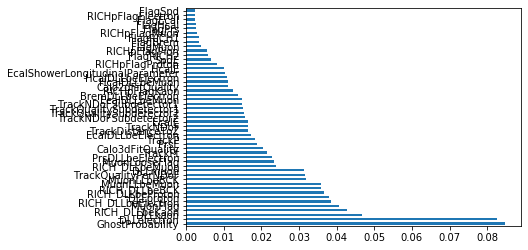

In [0]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_train,y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(49).plot(kind='barh')
plt.show()

In [0]:
model.feature_importances_

array([0.01837916, 0.0155678 , 0.01399616, 0.02637703, 0.00221401,
       0.00680341, 0.01868084, 0.02900519, 0.00202244, 0.01485694,
       0.01546941, 0.00257791, 0.08012746, 0.04473475, 0.01554791,
       0.03209983, 0.03873203, 0.02120109, 0.00347036, 0.03536502,
       0.00255355, 0.01023337, 0.0110425 , 0.02161082, 0.01649773,
       0.00556085, 0.01143318, 0.0195586 , 0.00245355, 0.02642017,
       0.01496695, 0.00816773, 0.01245446, 0.08314891, 0.01499583,
       0.03530118, 0.00572885, 0.00343334, 0.01090568, 0.01670002,
       0.00255403, 0.04482701, 0.03902549, 0.0100135 , 0.04673864,
       0.0039751 , 0.02174433, 0.02199557, 0.03873031])

In [0]:
fi = pd.DataFrame({'Specs':feat_importances.index, 'Score':feat_importances.values})
min = (pd.DataFrame.max(fi['Score']))/10
n_top_values=0
for i in fi['Score']:
  if i>=min:
    n_top_values +=1
specs = pd.DataFrame(fi.nlargest(n_top_values,'Score')) 
print (n_top_values, 'features selected')
print(specs)

36 features selected
                              Specs     Score
33                 GhostProbability  0.084764
12                      DLLelectron  0.082519
13                          DLLkaon  0.046837
41                   RICH_DLLbeKaon  0.042749
44                         MuonFlag  0.040536
42               RICH_DLLbeElectron  0.038458
16                        DLLproton  0.038014
48                 RICH_DLLbeProton  0.036646
35                    RICH_DLLbeBCK  0.035960
29                     MuonLLbeMuon  0.035935
19                      MuonLLbeBCK  0.031959
15              TrackQualityPerNDoF  0.031534
7                           DLLmuon  0.031309
47                   RICH_DLLbeMuon  0.023787
3                     MuonLooseFlag  0.023422
17                 PrsDLLbeElectron  0.022821
23                          TrackPt  0.021605
27                 Calo3dFitQuality  0.020541
46                             PrsE  0.018830
0                            TrackP  0.018364
6            

In [0]:
dataft = pd.DataFrame(datatrans)
for antigas in datatrans.columns :
  count=0
  for novas in specs['Specs'] :
    if antigas==novas or antigas=='Label':
      count=count+1
  if count==0 :
     dataft.drop(antigas, axis=1, inplace=True)
     print (antigas, "Deleted")

FlagSpd Deleted
SpdE Deleted
RICHpFlagElectron Deleted
FlagPrs Deleted
FlagRICH1 Deleted
FlagHcal Deleted
RICHpFlagPion Deleted
FlagEcal Deleted
RICHpFlagProton Deleted
FlagRICH2 Deleted
FlagBrem Deleted
RICHpFlagMuon Deleted
FlagMuon Deleted


In [0]:
dataft.shape

(1200000, 37)

## Correlation Matrix with Heatmap

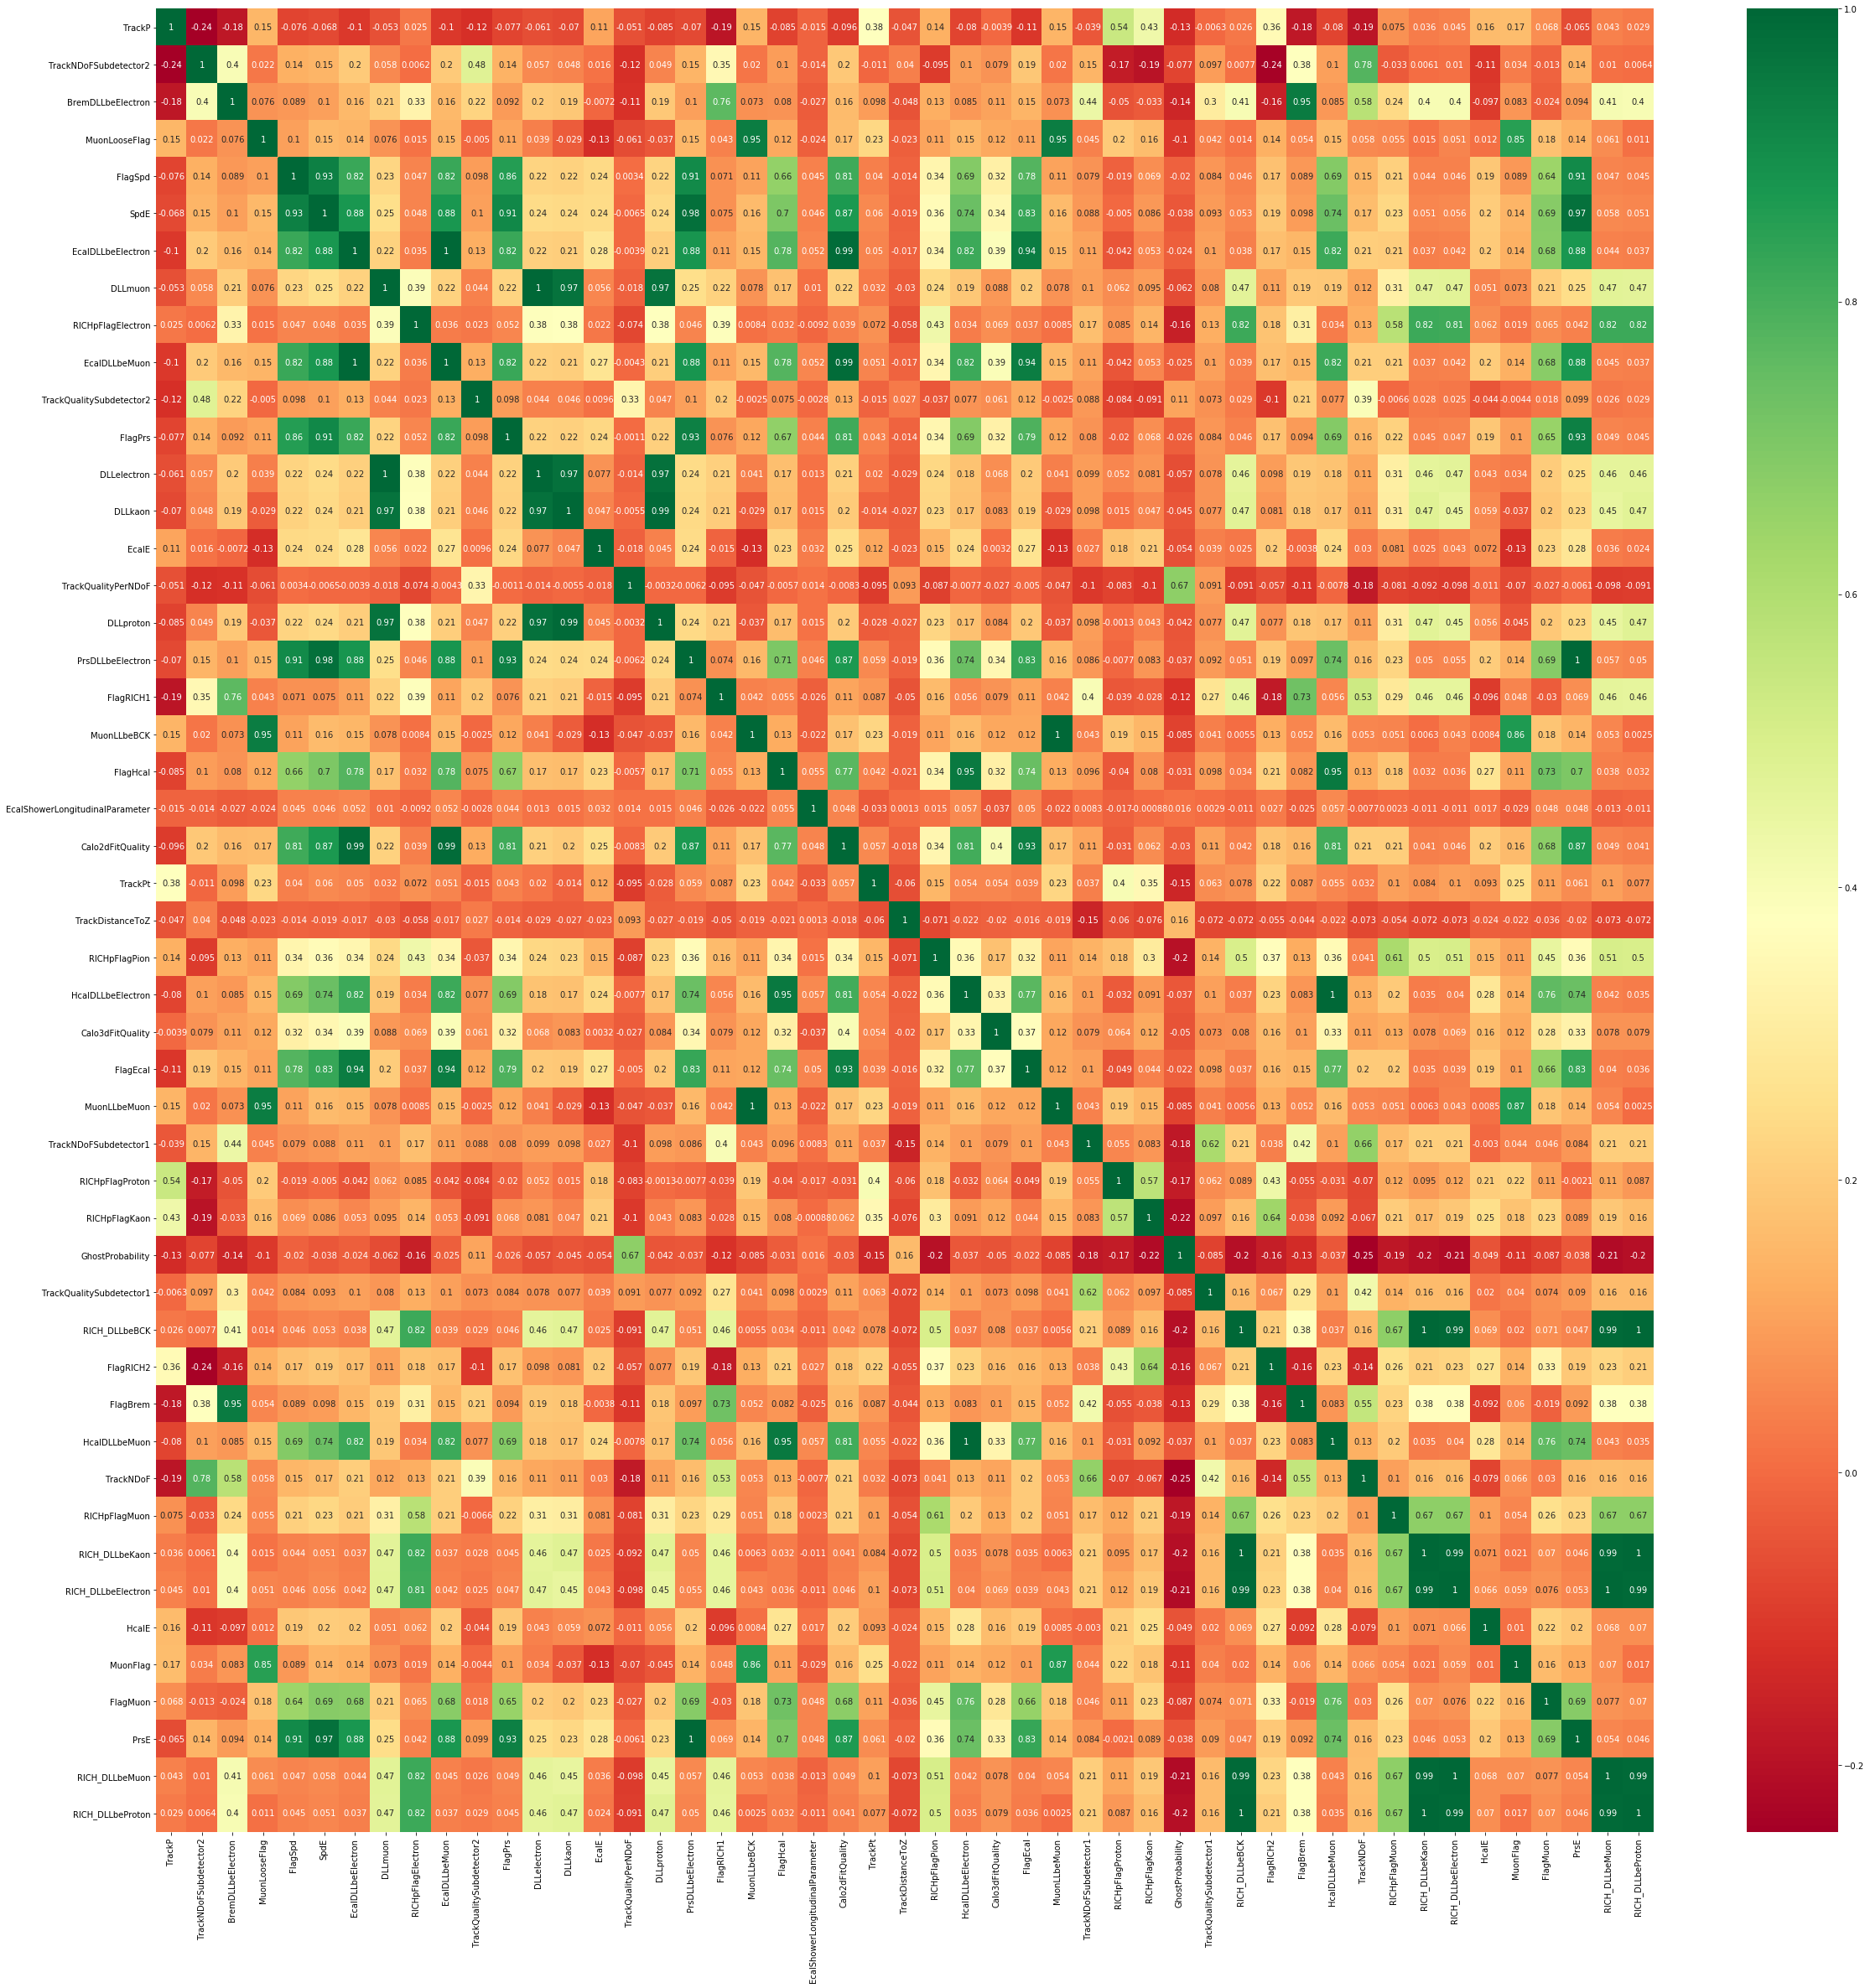

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = data.corr()
top_corr_features = corr.index
plt.figure(figsize=(40,40))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [0]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

In [0]:
selected_columns = data.columns[columns]
selected_columns.shape

(30,)

In [0]:
datacorr = data[selected_columns]

In [0]:
datacorr.head()

,TrackP,TrackNDoFSubdetector2,BremDLLbeElectron,MuonLooseFlag,FlagSpd,EcalDLLbeElectron,DLLmuon,RICHpFlagElectron,TrackQualitySubdetector2,EcalE,TrackQualityPerNDoF,FlagRICH1,FlagHcal,EcalShowerLongitudinalParameter,TrackPt,TrackDistanceToZ,RICHpFlagPion,Calo3dFitQuality,TrackNDoFSubdetector1,RICHpFlagProton,RICHpFlagKaon,GhostProbability,TrackQualitySubdetector1,RICH_DLLbeBCK,FlagRICH2,TrackNDoF,RICHpFlagMuon,HcalE,MuonFlag,FlagMuon
0,74791.156263,15.0,0.232275,1.0,1.0,-2.505719,6.604153,1.0,17.585680,0.000001,1.467550,1.0,1.0,-999.000000,3141.930677,0.613640,1.0,-999.000000,4.0,1.0,1.0,0.018913,5.366212,-21.913000,1.0,28.0,1.0,5586.589846,1.0,1.0
1,2738.489989,15.0,-0.357748,0.0,1.0,1.864351,0.263651,1.0,20.230680,1531.542000,3.570540,1.0,0.0,33.187644,199.573653,0.465480,1.0,13.667366,10.0,0.0,0.0,0.351206,9.144749,-0.703617,0.0,32.0,1.0,-0.000007,0.0,1.0
2,2161.409908,17.0,-999.000000,0.0,0.0,-999.000000,-999.000000,0.0,11.619878,-999.000000,0.826442,0.0,0.0,-999.000000,94.829418,0.241891,0.0,-999.000000,5.0,0.0,0.0,0.195717,1.459992,-999.000000,0.0,27.0,0.0,-999.000000,0.0,0.0
3,15277.730490,20.0,-0.638984,0.0,1.0,-2.533918,-8.724949,1.0,15.336305,4385.688000,1.076721,1.0,1.0,231.190351,808.631064,0.680705,1.0,1939.259641,9.0,0.0,1.0,0.003972,22.950573,-47.223118,1.0,36.0,1.0,4482.803707,0.0,1.0
4,7563.700195,19.0,-0.638962,0.0,1.0,-2.087146,-7.060422,1.0,10.954629,1220.930044,0.439767,1.0,1.0,-794.866475,1422.569214,0.575066,1.0,1867.165142,5.0,0.0,0.0,0.015232,3.516173,15.304688,0.0,33.0,1.0,5107.554680,0.0,1.0


## XGBoost Selection

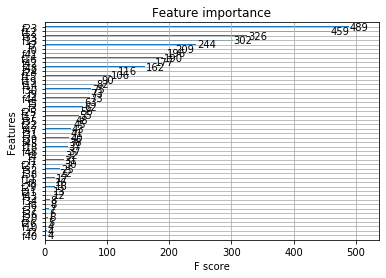

In [0]:
# plot feature importance using built-in function
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot

model = XGBClassifier()
model.fit(X_train_sc, y_train)

plot_importance(model)
pyplot.show()

In [0]:
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
fi = pd.DataFrame({'Specs':feat_importances.index, 'Score':feat_importances.values})
top = pd.DataFrame(featureScores.nlargest(49,'Score')) 
top

,Specs,Score
44,MuonFlag,272079.501493
29,MuonLLbeMuon,214466.418836
19,MuonLLbeBCK,213788.038345
3,MuonLooseFlag,211133.811080
33,GhostProbability,162993.061421
15,TrackQualityPerNDoF,58420.614867
14,EcalE,23653.092946
32,RICHpFlagKaon,20507.862716
23,TrackPt,18265.391355
31,RICHpFlagProton,16402.080764


## LightGBM

In [0]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, max_features=49)
embeded_lgb_selector.fit(X_train_sc, y_train)

embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X_train.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')
embeded_lgb_feature

22 selected features


['TrackP',
 'TrackNDoFSubdetector2',
 'EcalDLLbeElectron',
 'DLLmuon',
 'EcalDLLbeMuon',
 'DLLelectron',
 'DLLkaon',
 'EcalE',
 'TrackQualityPerNDoF',
 'DLLproton',
 'PrsDLLbeElectron',
 'TrackPt',
 'TrackDistanceToZ',
 'TrackNDoFSubdetector1',
 'GhostProbability',
 'RICH_DLLbeBCK',
 'TrackNDoF',
 'RICH_DLLbeKaon',
 'RICH_DLLbeElectron',
 'PrsE',
 'RICH_DLLbeMuon',
 'RICH_DLLbeProton']

In [0]:
embeded_lgb_selector.estimator_.feature_importances_

(49,)

In [0]:
embeded_lgb_selector.estimator_.feature_importances_.

<function ndarray.view>

In [0]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=49)
embeded_rf_selector.fit(X_train, y_train)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X_train.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

19 selected features


## PCA


In [0]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [0]:
data=pd.DataFrame(dataorigin)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data.Label)
le.classes_
labels = le.transform(data.Label)

labelspd = pd.DataFrame(labels)
labelspd.columns = ['Label']
data.drop(['Label'],axis=1,inplace=True)
datatrans = pd.concat([data,labelspd],axis=1)
dataprep = pd.DataFrame(datatrans)
#TRAIN TEST SPLIT

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(datatrans.drop('Label',axis=1), 
                                                    datatrans['Label'],
                                                    test_size=0.20, 
                                                    random_state=101)

In [0]:
#dataorigin.drop(['Label'],axis=1,inplace=True)

scaler = MinMaxScaler(feature_range=[0, 1])
data_rescaled = scaler.fit_transform(X_train, y_train)

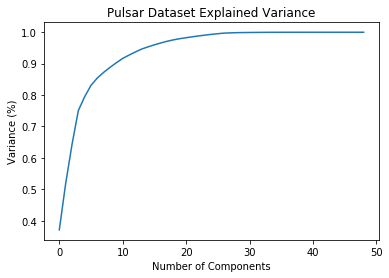

In [0]:
import matplotlib.pyplot as plt

#Fitting the PCA algorithm with our Data
pca = PCA().fit(data_rescaled)#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [0]:
pca = PCA(n_components=25)
dataset = pca.fit_transform(data_rescaled)
principalDf = pd.DataFrame(data = dataset, columns = ['pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8', 'pca9', 'pca10', 'pca11', 'pca12', 'pca13', 'pca14', 'pca15', 'pca16', 'pca17', 'pca18', 'pca19', 'pca20', 'pca21', 'pca22', 'pca23', 'pca24', 'pca25'])

In [0]:
datapca = pd.concat([principalDf, dataorigin['Label']],axis=1)

In [0]:
datapca

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25,Label
0,-0.799683,0.306357,-0.307189,0.267911,-0.248222,0.149783,-0.437358,0.327029,-0.243336,0.025956,0.016410,0.085549,0.006012,0.160232,0.026683,0.622393,-0.029122,-0.171787,-0.011292,0.096992,-0.000032,-0.019996,0.115565,-0.819345,-0.005134,Muon
1,-0.483928,-0.430255,1.245840,-0.189175,-0.820760,-0.020927,-0.195463,0.245078,-0.298004,-0.315420,0.068877,-0.114685,0.053652,0.016605,0.000048,0.017057,-0.068831,0.145332,-0.001081,-0.003014,-0.023506,0.001989,-0.137931,0.001040,-0.006643,Ghost
2,-0.186936,-1.180883,1.619343,1.174249,0.736158,0.127936,0.203745,-0.135258,0.289465,0.902221,-0.604211,0.867208,-0.128915,-0.015961,-0.571908,0.055625,-0.256015,-0.407121,0.031494,0.088127,0.030576,-0.031888,0.098331,-0.041841,-0.004753,Ghost
3,-0.531791,-0.748218,-0.453812,0.119152,-0.155096,0.079498,0.238852,-0.050799,-0.117023,-0.088022,-0.059901,-0.048757,-0.027092,0.346791,-0.023939,-0.009046,0.046840,-0.048265,0.000278,0.007948,0.008319,-0.012576,0.061600,0.006676,-0.006905,Pion
4,-0.450009,-0.470398,1.352370,-0.155424,-0.907939,-0.035890,-0.220143,0.400839,0.286078,0.203686,-0.149629,-0.192157,0.077992,-0.104712,0.013989,0.055863,0.120455,-0.026202,-0.000940,0.044829,0.052735,-0.025727,0.236807,-0.003304,-0.004165,Proton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pion
1199996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ghost
1199997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pion
1199998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Muon


# Select the Database

In [0]:
def select_db(i):
  switcher = {
      k:
      #TRAIN TEST SPLIT

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(datak.drop('Label',axis=1), 
                                                    datak['Label'],
                                                    test_size=0.20, 
                                                    random_state=101)

# NORMALIZATION

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train_sc = sc_x.fit_transform(X_train)
X_test_sc = sc_x.transform(X_test)
      fi:
      cm:
      xgb:
      lgbm:
  }

SyntaxError: ignored

# **Random Forest**

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
from pprint import pprint
from sklearn.model_selection import train_test_split


In [0]:
X_train, X_test, y_train, y_test = train_test_split(dataless.drop('Label',axis=1), 
                                                    dataless['Label'],
                                                    test_size=0.20, 
                                                    random_state=101)

## RS to Random Forest

In [0]:
#datapca2 = datapca.dropna()
data=pd.DataFrame(dataft)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data.Label)
le.classes_
labels = le.transform(data.Label)

labelspd = pd.DataFrame(labels)
labelspd.columns = ['Label']
data.drop(['Label'],axis=1,inplace=True)
datatrans = pd.concat([data,labelspd],axis=1)

#np.where(datatrans.values >= np.finfo(np.float64).max)
#TRAIN TEST SPLIT

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(datatrans.drop('Label',axis=1), 
                                                    datatrans['Label'],
                                                    test_size=0.20, 
                                                    random_state=101)

# NORMALIZATION

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train_sc = sc_x.fit_transform(X_train)
X_test_sc = sc_x.transform(X_test)

In [0]:
model = RandomForestClassifier()
parameters = {'criterion'     : ['gini','entropy'],
              'max_depth'     : sp_randInt(5, 25),              
              'min_samples_leaf' : sp_randInt(12, 29),
              'min_samples_split' : sp_randInt (75, 145),
              'n_estimators' : sp_randInt (25, 55)
              }
randm = RandomizedSearchCV(estimator=model, 
                           param_distributions = parameters,
                           cv=5,
                           n_jobs=-1,
                           verbose=1)

clf = randm.fit(X_train.iloc[:119999], y_train.iloc[:119999])


pprint(clf.best_estimator_.get_params())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 14.6min finished


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 19,
 'min_samples_split': 99,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 38,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [0]:
y_train

413320    4
953130    4
684224    1
355750    2
766538    4
         ..
661055    1
204614    4
476497    0
214539    4
176991    4
Name: Label, Length: 768000, dtype: int64

## Random Forest Model

In [0]:
rf = RandomForestClassifier(bootstrap=True,
                              ccp_alpha= 0.0,
                              class_weight= None,
                              criterion= 'entropy',
                              max_depth= 7,
                              max_features= 25,
                              max_leaf_nodes= None,
                              max_samples= None,
                              min_impurity_decrease= 0.0,
                              min_impurity_split= None,
                              min_samples_leaf= 19,
                              min_samples_split= 99,
                              min_weight_fraction_leaf= 0.0,
                              n_estimators= 38,
                              n_jobs= None,
                              oob_score= False,
                              random_state= None,
                              verbose= 1,
                              warm_start= True)

In [0]:
rf.fit(X_train, np.ravel(y_train)) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed: 22.4min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=7, max_features=25,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=19, min_samples_split=99,
                       min_weight_fraction_leaf=0.0, n_estimators=38,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=1, warm_start=True)

## LogLoss

In [0]:
clf_probs = rf.predict_proba(X_test)
score = log_loss(y_test, clf_probs)
print(score)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


1.7918562843354948


[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:    0.5s finished


##  Confusion Matrix

In [0]:
print("Accuracy score (training): {0:.3f}".format(rf.score(X_train_sc, y_train))) # Returns the mean accuracy on the given TRAINING DATA and labels. In multi-label classification, this is the subset accuracy which is a harsh metric since you require for each sample that each label set be correctly predicted.
print("Accuracy score (testing): {0:.3f}".format(rf.score(X_test_sc, y_test))) # Returns the mean accuracy on the given TESTING DATA and labels. In multi-label classification, this is the subset accuracy which is a harsh metric since you require for each sample that each label set be correctly predicted.

print ('----------------------------TRAINING DATA-------------------------------\n\n')

print ('Matriz de Confusão training_data :\n ')
predictions1 = rf.predict(X_train_sc) # Predictions of training data
print (confusion_matrix(y_train, predictions1)) # Confusion Matrix of training data

print("\n\nReports (Precision - Recall - F1 Score)\n")
print (classification_report(y_train, predictions1)) # Reports of training data

print ('----------------------------TESTING DATA-------------------------------\n\n')

print ('Matriz de Confusão testing_data : \n')
predictions3 = rf.predict(X_test_sc) # Predictions of testing data
print (confusion_matrix(y_test, predictions3)) # Confusion matrix of testing data

print("\n\nReports (Precision - Recall - F1 Score)\n")
print (classification_report(y_test, predictions3)) # Reports of testing data


NameError: ignored

# GBC

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(datak.drop('Label',axis=1), 
                                                    datak['Label'],
                                                    test_size=0.20, 
                                                    random_state=101)

# NORMALIZATION

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train_sc = sc_x.fit_transform(X_train)
X_test_sc = sc_x.transform(X_test)

## RS to GBC

In [0]:
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

gbc = GradientBoostingClassifier()
parameters = {'loss': ['deviance', 'exponential'],
              'learning_rate': sp_randFloat(0.11, 0.45),
              'max_depth'     : sp_randInt(3, 9),
              'max_features'  : sp_randInt(32, 42),
              'min_samples_leaf' : sp_randInt(7, 18),
              'min_samples_split' : sp_randInt (89, 115),
              'n_estimators' : sp_randInt (45, 59)
              } 
randm = RandomizedSearchCV(estimator=gbc, 
                           param_distributions = parameters,
                           cv=5,
                           n_jobs=-1,
                           verbose=1)

clf = randm.fit(X_train_sc, y_train)


pprint(clf.best_estimator_.get_params())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


## GBC Model

In [0]:
from sklearn.ensemble import GradientBoostingClassifier # Import Gradient Boost Classifier (GBC)

gb = GradientBoostingClassifier(ccp_alpha=0.0,
                                criterion= 'friedman_mse',
                                init= None,
                                learning_rate= 0.28,
                                loss= 'deviance',
                                max_depth= 6,
                                max_features=25 ,
                                max_leaf_nodes= None,
                                min_impurity_decrease= 0.0,
                                min_impurity_split= None,
                                min_samples_leaf= 10,
                                min_samples_split= 100,
                                min_weight_fraction_leaf= 0.0,
                                n_estimators= 51,
                                n_iter_no_change= None,
                                presort= 'deprecated',
                                random_state= None,
                                subsample= 1.0,
                                tol= 0.0001,
                                validation_fraction= 0.1,
                                verbose= 1,
                                warm_start= True)
                                

gbfit = gb.fit(X_train_sc, y_train) # Fit the gradient boosting model.

      Iter       Train Loss   Remaining Time 
         1     1375723.0878          103.71m
         2     1375463.1134          102.37m
         3     1375185.0922          100.26m
         4     1374944.7108           97.21m
         5     1374751.4445           94.25m
         6     1374443.7044           91.69m
         7     1374224.7979           89.37m
         8     1373989.8475           87.18m
         9     1373756.6205           84.97m
        10     1373497.3189           82.74m
        20     1371288.2119           62.75m


## LogLoss

In [0]:
from sklearn.metrics import log_loss

proba_gb = gb.predict_proba(X_test_sc) # Predict class probabilities for validation_data.
logloss = log_loss(y_test, proba_gb) # Log loss, aka logistic loss or cross-entropy loss. This is the loss function used in (multinomial) logistic regression and extensions of it such as neural networks, defined as the negative log-likelihood of the true labels given a probabilistic classifier’s predictions. The log loss is only defined for two or more labels. For a single sample with true label yt in {0,1} and estimated probability yp that yt = 1, the log loss is-log P(yt|yp) = -(yt log(yp) + (1 - yt) log(1 - yp))
print (logloss) # Print the log loss

## Confusion Matrix

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

print("Accuracy score (training): {0:.3f}".format(gb.score(X_train_sc, y_train))) # Returns the mean accuracy on the given TRAINING DATA and labels. In multi-label classification, this is the subset accuracy which is a harsh metric since you require for each sample that each label set be correctly predicted.
print("Accuracy score (testing): {0:.3f}".format(gb.score(X_test_sc, y_test))) # Returns the mean accuracy on the given TESTING DATA and labels. In multi-label classification, this is the subset accuracy which is a harsh metric since you require for each sample that each label set be correctly predicted.

print ('----------------------------TRAINING DATA-------------------------------\n\n')

print ('Matriz de Confusão training_data :\n ')
predictions1 = gb.predict(X_train_sc) # Predictions of training data
print (confusion_matrix(y_train, predictions1)) # Confusion Matrix of training data

print("\n\nReports (Precision - Recall - F1 Score)\n")
print (classification_report(y_train, predictions1)) # Reports of training data

print ('----------------------------TESTING DATA-------------------------------\n\n')

print ('Matriz de Confusão testing_data : \n')
predictions3 = gb.predict(X_test_sc) # Predictions of testing data
print (confusion_matrix(y_test, predictions3)) # Confusion matrix of testing data

print("\n\nReports (Precision - Recall - F1 Score)\n")
print (classification_report(y_test, predictions3)) # Reports of testing data

# XGBoost

# XGBoost Model

In [0]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

#instantiate model and train
xgb = XGBClassifier(eta=0.3,
                      alpha=0,
                      base_score=0.5, 
                      booster='gbtree', 
                      colsample_bylevel=1,
                      colsample_bynode=1, 
                      colsample_bytree=1, 
                      gamma=0,
                      learning_rate=0.05, 
                      max_delta_step=0, 
                      max_depth=5,
                      min_child_weight=1, 
                      missing=None, 
                      n_estimators=300, 
                      n_jobs=1,
                      nthread=None, 
                      objective='multi:softprob', 
                      random_state=0,
                      reg_alpha=0, 
                      reg_lambda=1, 
                      scale_pos_weight=1, 
                      seed=None,
                      silent=None, 
                      subsample=1, 
                      verbosity=1)
xgb.fit(X_train_sc, y_train)

## LogLoss

In [0]:
from sklearn.metrics import log_loss

proba_xgb = xgb.predict_proba(X_test_sc) # Predict class probabilities for validation_data.
logloss = log_loss(y_test, proba_xgb) # Log loss, aka logistic loss or cross-entropy loss. This is the loss function used in (multinomial) logistic regression and extensions of it such as neural networks, defined as the negative log-likelihood of the true labels given a probabilistic classifier’s predictions. The log loss is only defined for two or more labels. For a single sample with true label yt in {0,1} and estimated probability yp that yt = 1, the log loss is-log P(yt|yp) = -(yt log(yp) + (1 - yt) log(1 - yp))
print (logloss) # Print the log loss

## Confusion Matrix

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

print("Accuracy score (training): {0:.3f}".format(xgb.score(X_train_sc, y_train))) # Returns the mean accuracy on the given TRAINING DATA and labels. In multi-label classification, this is the subset accuracy which is a harsh metric since you require for each sample that each label set be correctly predicted.
print("Accuracy score (testing): {0:.3f}".format(xgb.score(X_test_sc, y_test))) # Returns the mean accuracy on the given TESTING DATA and labels. In multi-label classification, this is the subset accuracy which is a harsh metric since you require for each sample that each label set be correctly predicted.

print ('----------------------------TRAINING DATA-------------------------------\n\n')

print ('Matriz de Confusão training_data :\n ')
predictions1 = xgb.predict(X_train_sc) # Predictions of training data
print (confusion_matrix(y_train, predictions1)) # Confusion Matrix of training data

print("\n\nReports (Precision - Recall - F1 Score)\n")
print (classification_report(y_train, predictions1)) # Reports of training data

print ('----------------------------TESTING DATA-------------------------------\n\n')

print ('Matriz de Confusão testing_data : \n')
predictions3 = xgb.predict(X_test_sc) # Predictions of testing data
print (confusion_matrix(y_test, predictions3)) # Confusion matrix of testing data

print("\n\nReports (Precision - Recall - F1 Score)\n")
print (classification_report(y_test, predictions3)) # Reports of testing data

# Neural Network

In [0]:
import numpy
from keras.layers.core import Dense, Activation, Dropout
from keras.models import Sequential
from keras.optimizers import Adam, SGD
from keras.utils import np_utils
from keras import optimizers, regularizers
from keras.initializers import RandomNormal
from keras.layers import BatchNormalization
from keras import layers
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from keras.metrics import categorical_accuracy
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer

Using TensorFlow backend.


In [0]:
def nn_model(input_dim):
    model = Sequential() 
    
    model.add(Dense(200, kernel_regularizer=regularizers.l2(0.001), input_dim=input_dim))
    model.add(layers.BatchNormalization(axis=1))
    model.add(Dropout(0.1))
    model.add(Activation('relu'))

    
    model.add(Dense(600))
    model.add(Dropout(0.1))
    model.add(layers.BatchNormalization(axis=1))
    model.add(Activation('relu'))

    model.add(Dense(6))
    model.add(Activation('softmax'))

    sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
    adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0, amsgrad=False)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model
nn = nn_model(36)
nn.fit(X_train_sc, np_utils.to_categorical(y_train), verbose=1, nb_epoch=300, batch_size=512)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/300
960000/960000 [==============================] - 10s 10us/step - loss: 1.0689 - acc: 0.6045
Epoch 2/300
960000/960000 [==============================] - 9s 10us/step - loss: 0.8588 - acc: 0.6811
Epoch 3/300
960000/960000 [==============================] - 9s 10us/step - loss: 0.8038 - acc: 0.7005
Epoch 4/300
960000/960000 [==============================] - 9s 10us/step - loss: 0.7774 - acc: 0.7080
Epoch 5/300
960000/960000 [==============================] - 9s 10us/step - loss: 0.7562 - acc: 0.7147
Epoch 6/300
960000/960000 [==============================] - 9s 10us/step - loss: 0.7427 - acc: 0.7187
Epoch 7/300
960000/960000 [==============================] - 9s 10us/step - loss: 0.7319 - acc: 0.7211
Epoch 8/300
960000/960000 [==============================] - 9s 10us/step - loss: 0.7238 - acc: 0.7230
Epoch 9/300
960000/960000 [==============================] - 9s 10us/step - loss: 0.7175 - acc: 0.7246
Epoch 10/300
960000/960000 [==============================] - 9s 10us/st

In [0]:
proba_nn = nn.predict_proba(X_test_sc)
logloss = log_loss(y_test, proba_nn)
acc = categorical_accuracy(y_train_sc, proba_nn)
print (logloss)
print (acc)

NameError: ignored

In [0]:



print ('----------------------------TRAINING DATA-------------------------------\n\n')

print ('Matriz de Confusão training_data :\n ')
predictions1 = nn.predict(X_train_sc) # Predictions of training data
print (confusion_matrix(y_train, predictions1.argmax(axis=1))) # Confusion Matrix of training data

print("\n\nReports (Precision - Recall - F1 Score)\n")
print (classification_report(y_train, predictions1.argmax(axis=1))) # Reports of training data


print ('----------------------------TESTING DATA-------------------------------\n\n')

print ('Matriz de Confusão testing_data : \n')
predictions3 = nn.predict(X_test_sc) # Predictions of testing data
print (confusion_matrix(y_test, predictions3.argmax(axis=1))) # Confusion matrix of testing data

print("\n\nReports (Precision - Recall - F1 Score)\n")
print (classification_report(y_test, predictions3.argmax(axis=1))) # Reports of testing data

# Main Menu

In [0]:
def __main__ 